In [ ]:
from keras.models import Sequential            # 케라스의 Sequential()을 임포트
from keras.layers import Dense                 # 케라스의 Dense()를 임포트
from keras import optimizers                   # 케라스의 옵티마이저(학습 방법)를 임포트
import numpy as np                             # Numpy를 임포트

In [ ]:
# 1. 데이터
X = np.array([1, 2, 3, 4, 5, 6, 7 ,8 ,9, 10])             # 공부하는 시간(입력데이터)
Y = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])   # 각 공부하는 시간에 맵핑되는 성적(라벨 / 실제값)

In [ ]:
x_train = X[ : 7]                                         # 학습 데이터
y_train = Y[ : 7]

x_test = X[7 : ]                                          # 테스트 데이터
y_test = Y[7 : ]

In [ ]:
# 2. 모델 구성
model=Sequential()                                       # 입력층, 중간층, 출력층을 순서적으로 설계하겠다.
model.add(Dense(1, input_dim = 1, activation ='linear'))    # 입력값(X) / 예측값(Y’) /  Y’ = wX
model.summary()                                          # 모델 구성 보여줌

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 3. 학습 과정 설정
# 학습 방법 : sgd(stocastic gradient descent) / 학습률 : 0.01 / Cost function : mse
# 목표 : 오차를 최소하하기 위해 w, b를 학습
model.compile(optimizer = optimizers.SGD(lr = 0.01), loss='mse')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint('linear.h5', save_best_only = True)
Monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)

In [ ]:
# 4. 학습(학습 데이터로 모델 학습 / 테스트 데이터로 모델 검증[모델 평가])
history = model.fit(
                    x_train, y_train, validation_data=(x_test, y_test),
                    epochs=100, batch_size=1,
                    callbacks=[monitor_val_lose, modelCheckpoint]
                    )


Epoch 1/200
1/1 [==============================] - 1s 647ms/step - loss: 2484.4883 - val_loss: 3545.6628
Epoch 2/200
1/1 [==============================] - 0s 30ms/step - loss: 847.5087 - val_loss: 1260.3817
Epoch 3/200
1/1 [==============================] - 0s 30ms/step - loss: 289.4990 - val_loss: 460.5966
Epoch 4/200
1/1 [==============================] - 0s 40ms/step - loss: 99.2831 - val_loss: 175.8716
Epoch 5/200
1/1 [==============================] - 0s 28ms/step - loss: 34.4388 - val_loss: 71.7729
Epoch 6/200
1/1 [==============================] - 0s 32ms/step - loss: 12.3303 - val_loss: 32.1855
Epoch 7/200
1/1 [==============================] - 0s 28ms/step - loss: 4.7896 - val_loss: 16.2984
Epoch 8/200
1/1 [==============================] - 0s 27ms/step - loss: 2.2147 - val_loss: 9.4849
Epoch 9/200
1/1 [==============================] - 0s 26ms/step - loss: 1.3325 - val_loss: 6.3429
Epoch 10/200
1/1 [==============================] - 0s 33ms/step - loss: 1.0273 - val_loss: 4.

In [ ]:
# 모델 평가
model.evaluate(test_X, test_Y)

1/1 [==============================] - 0s 22ms/step - loss: 0.6967


0.6966592669487

In [ ]:
# 예측
predit = model.predict(test_X)

for i in range(0,len(predit)) :
    print("예측값 : ", predit[i], "\t실제값 : ", test_Y[i])

1/1 [==============================] - 0s 34ms/step
예측값 :  [79.383934] 	실제값 :  80
예측값 :  [89.181816] 	실제값 :  90
예측값 :  [98.9797] 	실제값 :  100


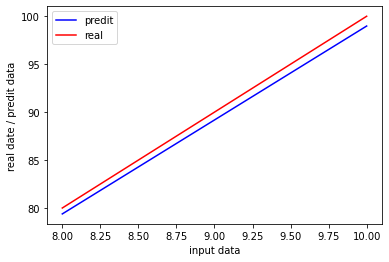

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_X, predit, 'b', label='predit')   # 예측값 그래프
plt.plot(test_X, test_Y, 'r', label= 'real')    # 실제값 그래프
plt.xlabel('input data')
plt.ylabel('real date / predit data')
plt.legend(loc='upper left')
plt.show()